In [75]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set()

In [76]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [77]:
df = pd.DataFrame.from_csv('deacorahWeather.csv')
df

,Max,Min,Precip,Snow
1893-03-01,26,4,0,0
1893-03-02,20,9,0,0
1893-03-03,10,0,0,0
1893-03-04,18,-9,0,0
1893-03-05,29,-10,0,0
1893-03-06,23,-9,0,0
1893-03-07,46,15,70,5
1893-03-08,40,23,0,0
1893-03-09,43,20,0,0
1893-03-10,50,29,40,3


In [78]:
hot = df[df.Max == df.Max.max()]
hot

,Max,Min,Precip,Snow
1936-07-14,111,71,0,0


In [79]:
cold = df[df.Min == df.Min.min()]
cold

,Max,Min,Precip,Snow
1951-01-30,2,-43,0,0


In [80]:
#most rainfall
rain = df[df.Precip == df.Precip.max()]
rain

,Max,Min,Precip,Snow
1941-05-30,68,58,770,0


In [81]:
#most snow
snow = df[df.Snow == df.Snow.max()]
snow

,Max,Min,Precip,Snow
1971-01-04,24,6,115,15


In [82]:
#df['Dif']=df['Max']-df['Min']
#maxVariance = df[df.Dif == df.Dif.max()]
#maxVariance
diff = df['Max'].sub(df['Min'])
date = diff.idxmax()
#print(date)
maxdiff = diff.max()
print(date,maxdiff)

1948-02-16 00:00:00 78.0


In [83]:
#periods of droughts
prev = 0
days_since_rain = []
for value in df.Precip:
    #print(value)
    if (value == 0):
        prev+=1
        days_since_rain.append(prev)
    else:
        prev = 0
        days_since_rain.append(prev)
#print(days_since_rain)
df['days_since_rain']= days_since_rain
longest_drought = df[df.days_since_rain == df.days_since_rain.max()]
longest_drought

,Max,Min,Precip,Snow,days_since_rain
1948-08-31,81,51,0,0,62


In [84]:
#isolate large storms by looking for consecutive days of rain

prev = 0
continous_rain = []
for value in df.Precip:
    if(value > 0):
        prev += 1
        continous_rain.append(prev)
    else:
        prev = 0
        continous_rain.append(prev)
df['continous_rain'] = continous_rain
large_storms = df[df.continous_rain >5] #where rain is continous for more than 5 days
large_storms
    


,Max,Min,Precip,Snow,days_since_rain,continous_rain
1902-05-06,58,50,110,0,0,6
1902-06-15,78,58,13,0,0,6
1903-08-27,69,57,53,0,0,6
1903-08-28,61,51,55,0,0,7
1903-08-29,61,56,8,0,0,8
1903-09-09,71,57,2,0,0,6
1903-09-10,73,51,6,0,0,7
1906-10-26,55,47,2,0,0,6
1906-10-27,51,38,28,0,0,7
1908-10-25,42,37,3,0,0,6


In [85]:
#which Saturdays in the summer months have the least amount of rain
summer_month = []
summer_rain = []
for idx,val in df.iterrows():
    #print(idx)
    if((idx.month == 6)|(idx.month == 7)| (idx.month == 8)):#summer month June,July,August
        if (idx.dayofweek == 5):#Saturdays
            summer_month.append(idx) 
            #print(val.Precip)
            summer_rain.append(val.Precip)

#summer_month
#summer_df = df.loc(summer_month,'Precip')
summer_df = pd.DataFrame()
summer_df['Dates'] = summer_month
summer_df['Precip'] = summer_rain
#summer_df
least_rain = summer_df[summer_df.Precip == summer_df.Precip.min()]
least_rain





,Dates,Precip
1,1893-08-05,0
2,1893-08-12,0
3,1893-08-19,0
4,1893-08-26,0
5,1894-06-02,0
6,1894-06-09,0
9,1894-06-30,0
10,1894-07-07,0
11,1894-07-14,0
12,1894-07-21,0


In [86]:
#For each year how much precip is due to snowfall
snow= []
rain = []
dates = []
for idx,val in df.iterrows():
    #print(idx)
    if((val.Precip > 0)&(val.Snow > 0)):
        snow.append(val.Snow)
        rain.append(val.Precip)
        dates.append(idx)

#summer_month
#summer_df = df.loc(summer_month,'Precip')
rain_snow_corelation = pd.DataFrame(index = dates)#getting dates in new dataframe
rain_snow_corelation['Snow'] = snow
rain_snow_corelation['Rain'] = rain
rain_snow_corelation


,Snow,Rain
1893-03-07,5,70
1893-03-10,3,40
1893-03-22,6,90
1893-11-21,4,40
1893-11-25,8,90
1893-11-26,1,6
1893-11-30,2,15
1893-12-02,1,2
1893-12-06,1,2
1893-12-09,1,2


In [87]:
#Look for extreme outliers of precipitation snow in august/rain in january
summer_snow = []
winter_rain = []
date = []
for idx,val in df.iterrows():
    #print(idx)
    if((idx.month == 4)|(idx.month == 5)|(idx.month == 6)|(idx.month == 7)| (idx.month == 8)|(idx.month == 9)|(idx.month == 10)):#summer month June,July,August
        if(val.Snow > 0):
            summer_snow.append(val.Snow)
            date.append(idx)
#summer_snow           
outlier_summer = pd.DataFrame(index = date)
outlier_summer['Snow'] = summer_snow
outlier_summer

,Snow
1951-04-01,1
1952-04-10,1
1952-04-13,5
1952-04-14,3
1956-04-29,2
1960-04-18,1
1961-04-17,2
1962-04-01,2
1962-04-02,1
1962-04-09,1


In [88]:
#Look for extreme outliers of precipitation snow in august/rain in january
winter_rain = []
date = []
for idx,val in df.iterrows():
    if((idx.month == 1)|(idx.month == 2)|(idx.month == 11)):
        if(val.Precip > 0):
            winter_rain.append(val.Precip)
            date.append(idx)
#summer_snow           
outlier_winter = pd.DataFrame(index = date)
outlier_winter['Precip'] = winter_rain
outlier_winter

,Precip
1893-11-21,40
1893-11-25,90
1893-11-26,6
1893-11-30,15
1894-01-05,22
1894-01-19,42
1894-01-20,14
1894-01-23,14
1894-01-28,22
1894-02-09,21


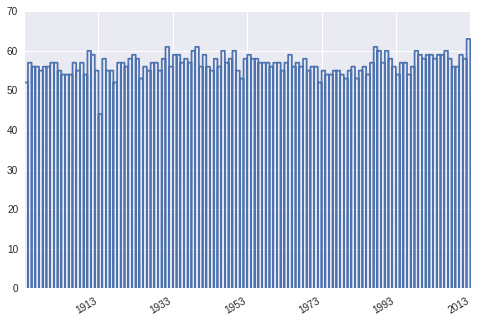

In [89]:
#Have a line plot of highs and lows (average per year) to see the trend
#year_array = []
#for idx,val in df.iterrows():
    #if (idx.year not in year_array):
       # year_array.append(idx.year)
#print(len(year_array))

current = 1893
cum_max = 0
n = 0
df['average_max'] = 0
av_max = 0
date_array = []
len_av = []
#while(current != 2014):
for idx,val in df.iterrows():
    if(idx.year == current):
        cum_max += val.Max
        n += 1
        date_array.append(idx)
    else:
        #current = idx.year
        av_max = cum_max/n
        for date in date_array:
            df.set_value(date,'average_max',av_max)
            
        cum_max = 0
        date_array = []
        current += 1
        #print(av_max)
        len_av.append(av_max)
        av_max = 0
        n = 0

#print(len(len_av))   
#df.head(300)
df.average_max.plot()


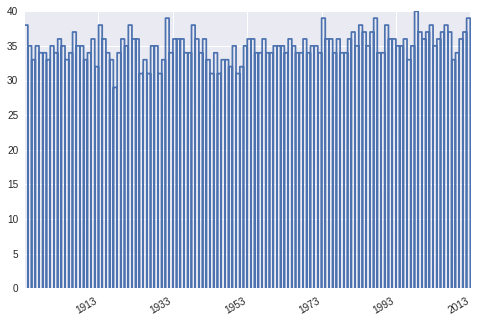

In [90]:
#average min each year
current = 1893
cum_max = 0
n = 0
df['average_min'] = 0
av_min = 0
date_array = []
len_av = []
for idx,val in df.iterrows():
    if(idx.year == current):
        cum_min += val.Min
        n += 1
        date_array.append(idx)
    else:
        #current = idx.year
        av_min = cum_min/n
        for date in date_array:
            df.set_value(date,'average_min',av_min)
            
        cum_min = 0
        date_array = []
        current += 1
        #print(av_max)
        #len_av.append(av_min)
        av_min = 0
        n = 0

#print(len(len_av))   
#df.head(300)
df.average_min.plot()


In [91]:
#Which years had white christmases? or not

white_christmas_date = []
white_christmas_precip = []
for idx,val in df.iterrows():
    if((idx.month == 12)&(idx.day == 24)&(val.Snow > 0)): 
        white_christmas_date.append(idx)
        white_christmas_precip.append(val.Snow)
white_christmas = pd.DataFrame(index = white_christmas_date)
white_christmas['White_Christmas'] = white_christmas_precip
white_christmas
        


,White_Christmas
1893-12-24,4
1895-12-24,1
1902-12-24,1
1909-12-24,3
1916-12-24,3
1925-12-24,3
1932-12-24,1
1941-12-24,1
1945-12-24,2
1952-12-24,1


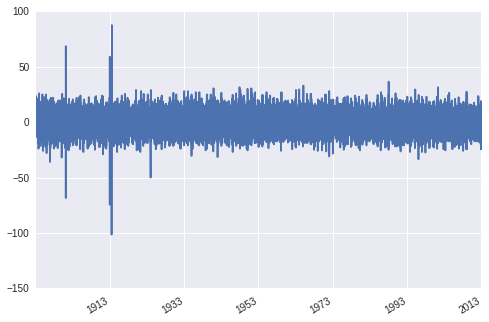

In [92]:
#Average high and low for the day and find change from previous day. Check to see if that correlates with precipitation
average_temp = []
date_array = []
precip_array = []
average = 0
delta = []
mean = pd.DataFrame(index = df.index)
for idx,val in df.iterrows():
    average = (val.Min + val.Max)/2
    average_temp.append(average)
    precip_array.append(val.Precip)
mean['average_temp'] = average_temp
average_temp.insert(0,0)
#print(len(average_temp))
last_val = average_temp.pop(43442)
#print(last_val)
#len(average_temp)
previous_temp = average_temp
mean['previous_day_temp'] = previous_temp
mean['Precip'] = precip_array
#mean

for idx,val in mean.iterrows():
    delta.append(val.average_temp - val.previous_day_temp)
mean['change_temp'] = delta
#mean
mean.change_temp.plot()



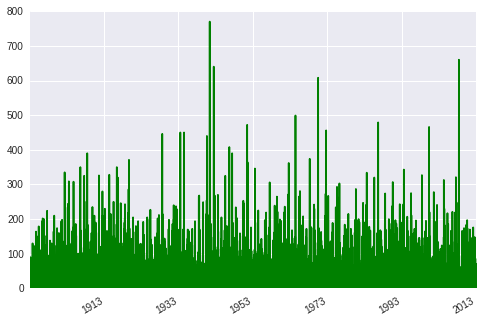

In [93]:
mean.Precip.plot(color = 'green')

In [96]:
max_precip = mean[mean.Precip == mean.Precip.max()]
max_precip

,average_temp,previous_day_temp,Precip,change_temp
1941-05-30,63,71.5,770,-8.5
